In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from DAFD.rv_study.rv_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d

Using TensorFlow backend.


regime classifier
Loading classifier
Train accuracy: 0.9887387387387387

Regression model generation_rate2
Loading Regressor
R square (R^2) for Train:                 0.987384

Regression model droplet_size2
Loading Regressor
R square (R^2) for Train:                 0.983142

Regression model generation_rate1
Loading Regressor
R square (R^2) for Train:                 0.965872

Regression model droplet_size1
Loading Regressor
R square (R^2) for Train:                 0.953238



In [2]:
# Load Dataset and sort
chips = pd.read_csv("20210203_designspace_dripping.csv")
all_results = pd.read_csv("20210203_complete_dripping.csv")
chips = chips.sort_values("score")

In [3]:
all_results.shape

(555671, 12)

In [45]:
chips.tail(1).to_dict()


{'Unnamed: 0': {11379: 11379},
 'aspect_ratio': {11379: 1.0},
 'expansion_ratio': {11379: 2.5},
 'normalized_oil_inlet': {11379: 2.0},
 'normalized_orifice_length': {11379: 3.0},
 'normalized_water_inlet': {11379: 2.0},
 'orifice_size': {11379: 125},
 'score': {11379: 36353.243610564685},
 'size_score': {11379: 132.25651550292972},
 'rate_score': {11379: 443.068115234375}}

LOWEST 1.982565
HIGHEST 36353.243611


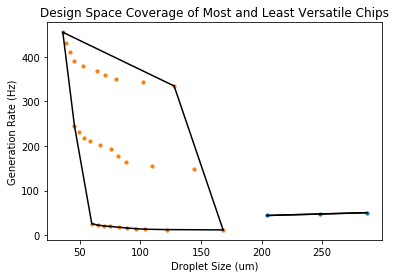

In [46]:
highest_results = all_results.loc[all_results["chip_num"]==chips.iloc[-1, 0], :]
lowest_results = all_results.loc[all_results["chip_num"]==chips.iloc[0, 0], :]

print("LOWEST %f" % chips.head(1)["score"])
print("HIGHEST %f" % chips.tail(1)["score"])


for x in [lowest_results, highest_results]:
    sizes = x["size"].tolist()
    rates = x["rate"].tolist()
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plt.title("Design Space Coverage of Most and Least Versatile Chips")
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
plt.savefig("VersatilityExtremes_Compare.png")

*Main Effect Analysis*

In [39]:
chips = chips.loc[chips["score"]!=-1, :]
#all_results = all_results.loc[(all_results["chip_num"] in chips.iloc[:, 0]), :]



mean_size = all_results["size"].mean()
mean_rate = all_results["rate"].mean()


In [40]:
size_normalized = (all_results["size"]/all_results["orifice_size"])
mean_size_normalized = size_normalized.mean()

In [41]:
mean_score = chips["score"].mean()
mean_size_score = chips["size_score"].mean()
mean_rate_score = chips["rate_score"].mean()

In [42]:
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size']#, "capillary_number", "flow_rate_ratio"]

meff_vals = {}
for col in meff_cols:
    sweep_range = all_results[col].unique()
    size_score_avgs = []
    rate_score_avgs = []
    score_avgs = []
    for val in sweep_range:
        #size_avgs.append(size_normalized[all_results[col] == val].mean())
        size_score_avgs.append(chips.loc[chips[col] == val, "size_score"].mean())
        rate_score_avgs.append(chips.loc[chips[col] == val, "rate_score"].mean())
        score_avgs.append(chips.loc[chips[col] == val, "score"].mean())
    #meff_vals[col] = {"range": sweep_range, "size_averages": size_avgs, "rate_averages": rate_avgs}
    meff_vals[col] = {"range": sweep_range, "size_score_avgs": size_score_avgs, "rate_score_avgs": rate_score_avgs, "score_avgs": score_avgs}
        

In [60]:
pd.DataFrame(meff_vals["orifice_size"]).T

,0,1,2,3,4
range,75.000000,100.000000,125.000000,150.000000,175.000000
size_score_avgs,91.382772,111.807572,131.381876,143.978137,145.712140
rate_score_avgs,242.668655,184.093504,127.887675,102.312127,95.308620
score_avgs,10348.511746,10025.505726,9029.561781,8841.540366,9197.683717


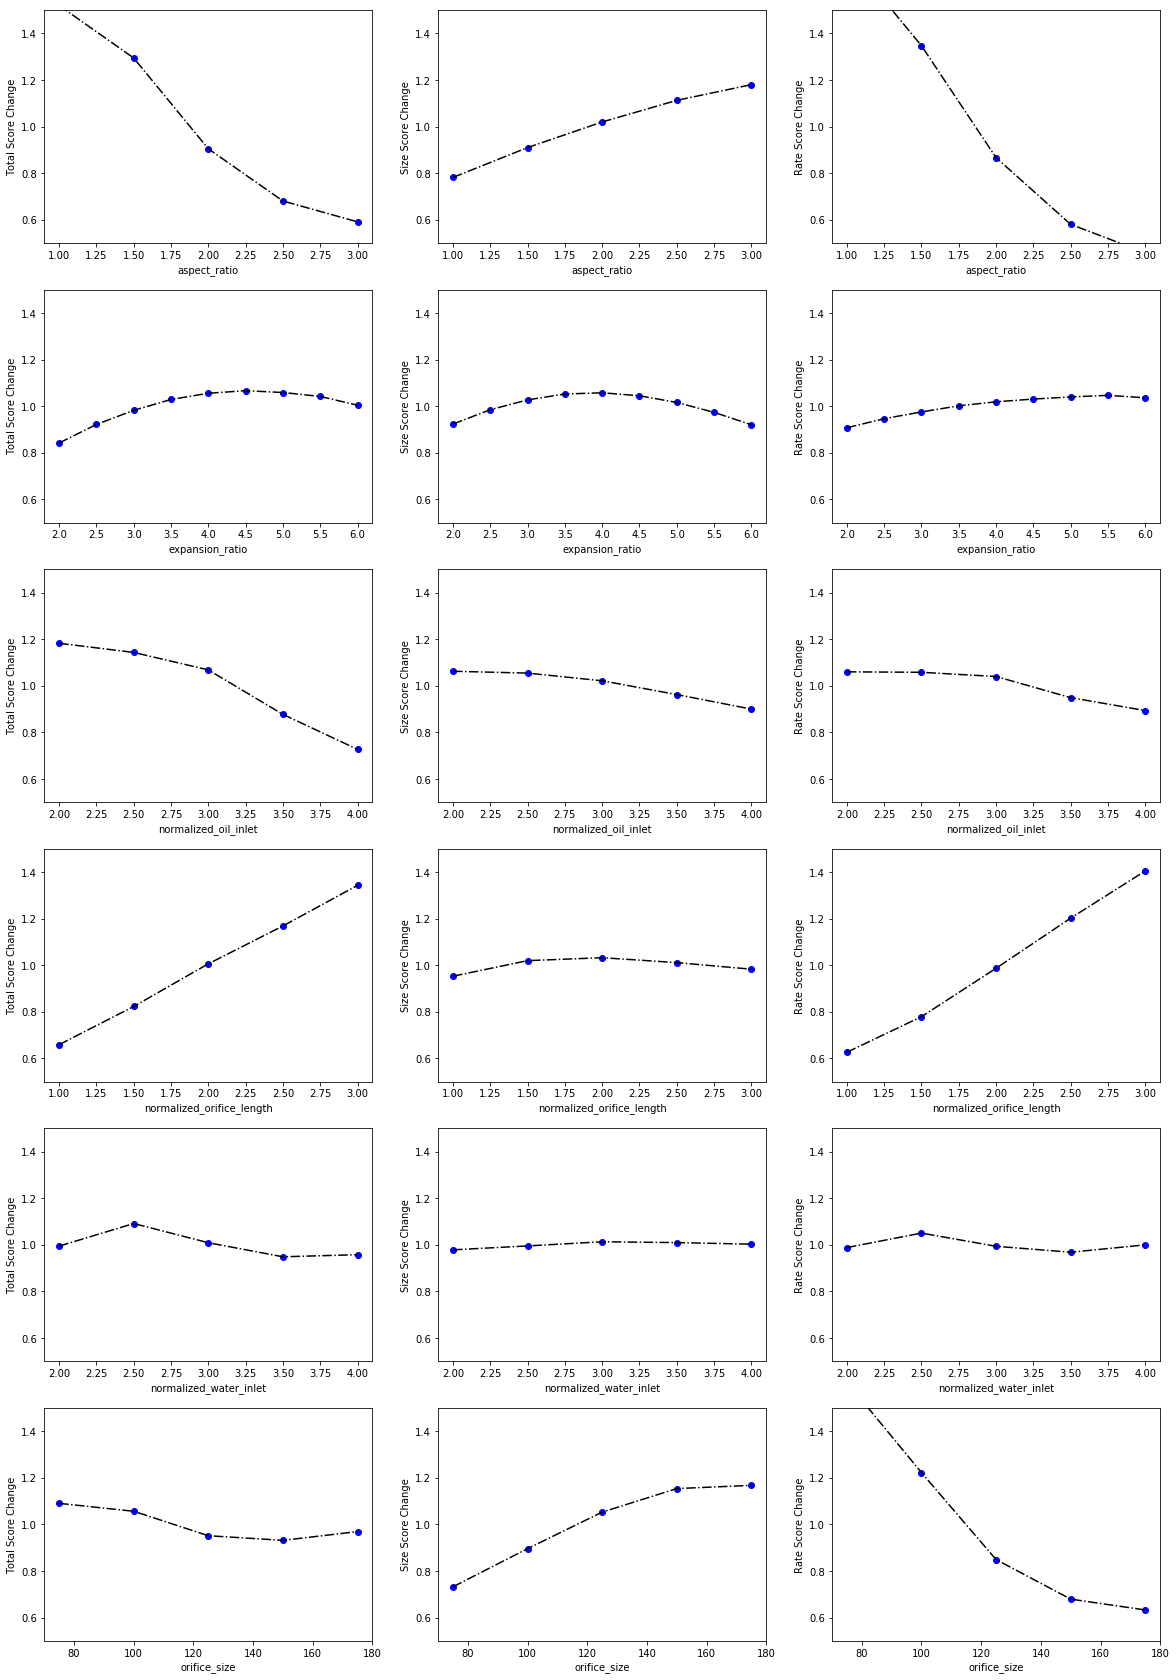

In [44]:
fig, axs = plt.subplots(6,3, figsize=[20,30])
for i, param in enumerate(meff_vals.keys()):
    param_range = meff_vals[param]["range"]
    score_normed =  meff_vals[param]["score_avgs"]/mean_score
    size_score_normed = meff_vals[param]["size_score_avgs"]/mean_size_score
    rate_score_normed = meff_vals[param]["rate_score_avgs"]/mean_rate_score
    
    axs[i][0].plot(param_range, score_normed, "bo")
    axs[i][0].plot(param_range, score_normed, "k-.")
    
    axs[i][0].set_xlabel(param)
    axs[i][0].set_ylabel("Total Score Change")
    axs[i][0].set_ylim([0.5, 1.5])
        
    axs[i][1].plot(param_range, size_score_normed, "bo")
    axs[i][1].plot(param_range, size_score_normed, "k-.")
    
    axs[i][1].set_xlabel(param)
    axs[i][1].set_ylabel("Size Score Change")
    axs[i][1].set_ylim([0.5, 1.5])
    
    axs[i][2].plot(param_range, rate_score_normed, "bo")
    axs[i][2].plot(param_range, rate_score_normed, "k-.")

    axs[i][2].set_xlabel(param)
    axs[i][2].set_ylabel("Rate Score Change")
    axs[i][2].set_ylim([0.5, 1.5])
    
plt.savefig('MainEffectAnalysis_versatility_values.png')

In [87]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B0241E668>,
      dtype=object)